# 회귀(Regression)
- 사용 데이터: fetch_california_housing (켈리포니아 하우징)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022 
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 데이터 불러오기
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
house.data.shape

(20640, 8)

In [5]:
# 
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

In [19]:
# 회귀시 표준화 잘 안해서 그냥 고고 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size = 0.1, random_state = seed # 분류와 다르게 테스트할게 많이 없으니 test_size = 0.1
) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

2. 회귀 모델 정의/설정/학습/평가

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential([
                    Dense(20, input_dim=8, activation='relu'),
                    Dense(6, activation='relu'),
                    Dense(1)

])
model.summary()
### 회귀 #### 
# 노드 개수: 1
# 활성화 함수(activation): 사용 X (출력층에서)
# 손실 함수: mean_squared_error

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 dense_7 (Dense)             (None, 6)                 126       
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop', loss='mean_squared_error') 
# 회귀 -> metrics 사용 X 
# 회귀는 모델 단순화이기 때문 

In [26]:
hist = model.fit(X_train, y_train, validation_split = 0.1,
                 epochs=100, batch_size=256)

Epoch 1/100
168/168 [==============================] - 2s 5ms/step - loss: 6100.0972 - val_loss: 11.1728
Epoch 2/100
168/168 [==============================] - 0s 3ms/step - loss: 14.2590 - val_loss: 4.4969
Epoch 3/100
168/168 [==============================] - 0s 3ms/step - loss: 11.4644 - val_loss: 5.5971
Epoch 4/100
168/168 [==============================] - 1s 4ms/step - loss: 11.2878 - val_loss: 1.9589
Epoch 5/100
168/168 [==============================] - 1s 3ms/step - loss: 11.2429 - val_loss: 1.4145
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 10.1894 - val_loss: 9.4110
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 9.5019 - val_loss: 3.4192
Epoch 8/100
168/168 [==============================] - 0s 2ms/step - loss: 9.7525 - val_loss: 10.0946
Epoch 9/100
168/168 [==============================] - 0s 2ms/step - loss: 8.8888 - val_loss: 82.8558
Epoch 10/100
168/168 [==============================] - 0s 2ms/step - loss: 10.0

In [27]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 1.7738


1.7737537622451782

In [29]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

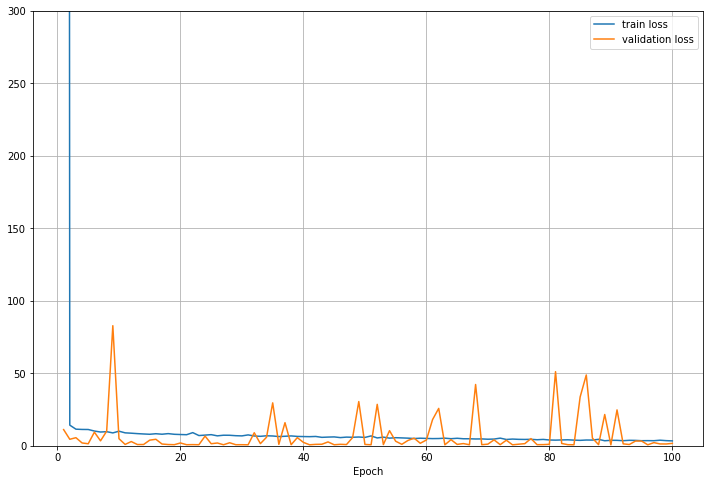

In [31]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0,300)
plt.xlabel('Epoch')
plt.show()


### 평가

In [32]:
pred = model.predict(X_test) # .evaluate 도 있음 

In [33]:
dft = pd.DataFrame({'y_test': y_test, 'pred': pred.flatten()})
dft.head()

,y_test,pred
0,4.771,2.792676
1,1.371,0.897531
2,1.233,-0.077168
3,0.938,1.007934
4,3.260,2.308604


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred), r2_score(y_test, pred)
# pred 음수값 -> 그래프상 데이터가 막 튀는 구간이 많아서, 데이터 잘 예측 못해서?

(1.773754321268171, -0.38205215481283594)